In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
data = pd.read_csv(r'D:\My Creations\New folder\Space_Corrected.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [4]:
data.describe()

,Unnamed: 0,Unnamed: 0.1
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


In [6]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


FEATURE ENGINEERING AND DATA CLEANING

This is just after the checking the dataset and I keep changing the dataset as required while visualisation

In [9]:
data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1, inplace=True)

In [11]:
data['Location']

0              LC-39A, Kennedy Space Center, Florida, USA
1       Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                           Pad A, Boca Chica, Texas, USA
3            Site 200/39, Baikonur Cosmodrome, Kazakhstan
4                SLC-41, Cape Canaveral AFS, Florida, USA
                              ...                        
4319             LC-18A, Cape Canaveral AFS, Florida, USA
4320             LC-26A, Cape Canaveral AFS, Florida, USA
4321             LC-18A, Cape Canaveral AFS, Florida, USA
4322            Site 1/5, Baikonur Cosmodrome, Kazakhstan
4323            Site 1/5, Baikonur Cosmodrome, Kazakhstan
Name: Location, Length: 4324, dtype: object

In [13]:
data['Country']= data.Location.apply(lambda x: x.split()[-1])

In [14]:
data.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


DATA VISUALISATION

Lets first analyse how many missions were successsful and how many of them were failutr using countplot and pie chart.

In [16]:
#% calculation

success = data['Status Mission'].isin(['Success']).sum()
failure = data['Status Mission'].isin(['Failure']).sum()
prelaunch_failure = data['Status Mission'].isin([' Prelaunch Failure']).sum()
partial_failure = data['Status Mission'].isin(['Partial_failure']).sum()

print('Success % :', success/len(data['Status Mission'])*100, '%')
print('failure % :', failure/len(data['Status Mission'])*100, '%')
print('prelaunch_failure % :', prelaunch_failure/len(data['Status Mission'])*100, '%')
print('partial_failure % :', partial_failure/len(data['Status Mission'])*100, '%')



Success % : 89.70860314523588 %
failure % : 7.8399629972247915 %
prelaunch_failure % : 0.0 %
partial_failure % : 0.0 %


([<matplotlib.patches.Wedge at 0x1a65940c3a0>,
 [Text(-1.0651229222703165, 0.27479658013581865, 'success'),
  Text(1.0651229351344718, -0.27479653027381545, 'Failure'),
  Text(1.199999999999995, 1.123521081228424e-07, ' PrelaunchFailure'),
  Text(1.199999999999995, 1.123521081228424e-07, ' PrelaunchFailure')],
 [Text(-0.5809761394201726, 0.1498890437104465, '92.0%'),
  Text(0.5809761464369845, -0.14988901651299025, '8.0%'),
  Text(0.699999999999997, 6.553872973832472e-08, '0.0%'),
  Text(0.699999999999997, 6.553872973832472e-08, '0.0%')])

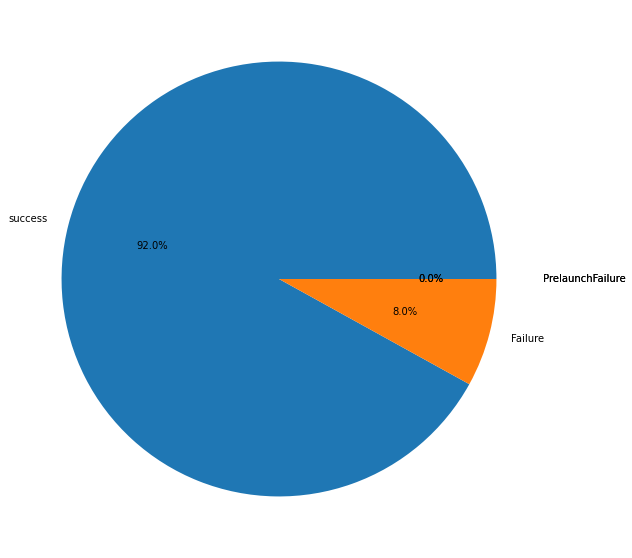

In [18]:
plt.figure(figsize=(10,10))
labels = ['success', 'Failure',' PrelaunchFailure',' PrelaunchFailure']
percentages = [success ,failure ,prelaunch_failure, partial_failure]
plt.pie(percentages ,labels =labels ,explode=[0,0,0.1,0.1],autopct='%1.1f%%', shadow=False)

c:\users\pc-lenovo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status Mission', ylabel='count'>

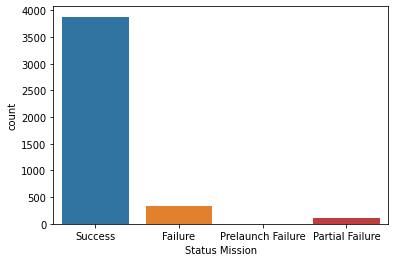

In [19]:
sns.countplot(data['Status Mission'])

Analysis on the basis of the company who manufactured

In [20]:
data['Company Name'].value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
ESA                   13
Eurockot              13
Rocket Lab            13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
AMBA                   8
CNES                   8
Land Launch            7
MITT                   7
JAXA                   7
KCST                   5
UT                     5
CASIC                  5
Exos                   4
Arm??e de l'Air        4
CECLES                 4


THE PLOTS GET CLUMSY IF EACH ANd EVERY COMPANY IS PLOTTED IN IT, SO PLOTTING SOME OF THE WELL KNOWN COMPANY

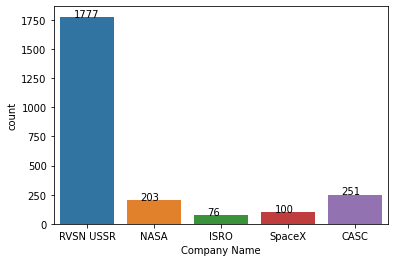

In [26]:
ax = sns.countplot(x = 'Company Name',data=data, order =['RVSN USSR','NASA','ISRO','SpaceX','CASC'])

for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.2, p.get_height()))

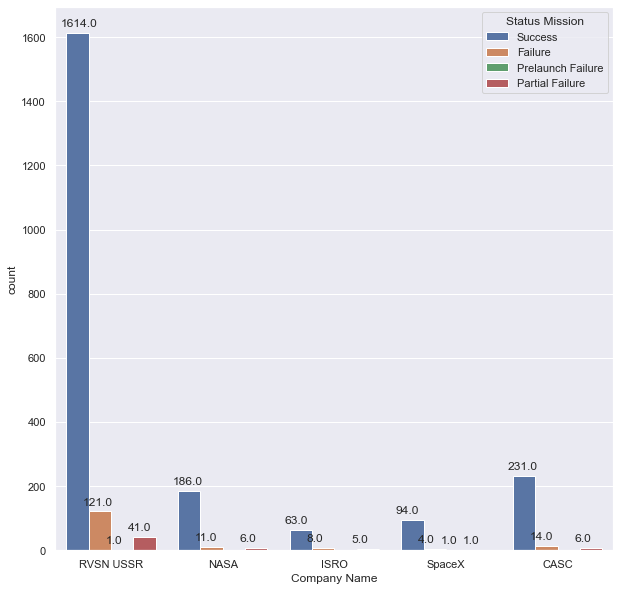

In [30]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax=sns.countplot(x= 'Company Name', data = data, order=['RVSN USSR','NASA','ISRO','SpaceX','CASC'], hue="Status Mission")

for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()-0.05, p.get_height()+20))

Classifying the data based on the basis of county who  have launched the mission 

<AxesSubplot:xlabel='count', ylabel='Country'>

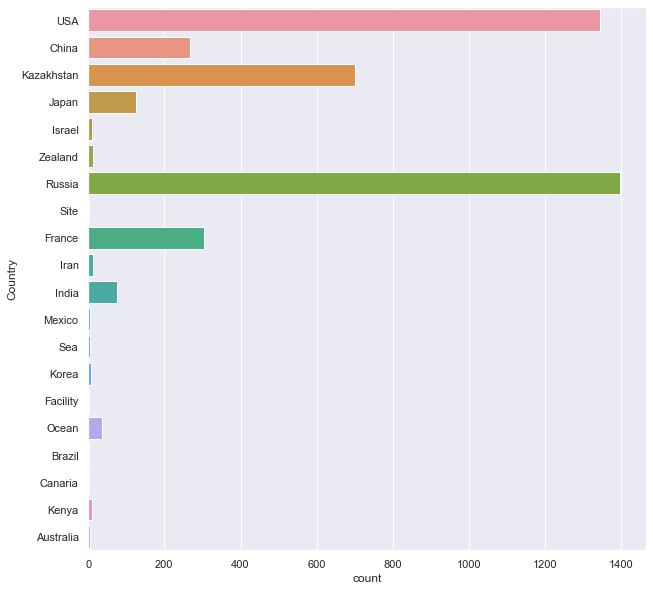

In [31]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.countplot(y= 'Country' ,data=data)

RUSSIA AND USA HAVE DONE THE MOST NUMBER OF SPACE MISSIONS 

<AxesSubplot:xlabel='count', ylabel='Country'>

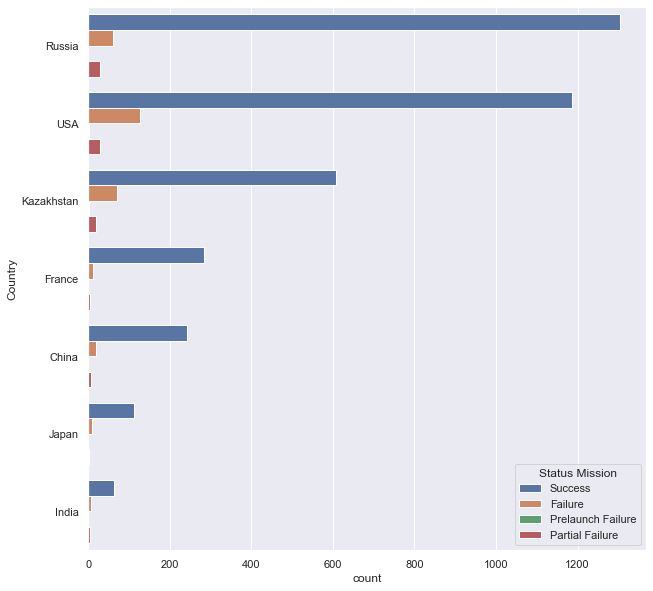

In [34]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.countplot(y= 'Country' ,data=data, order=['Russia', 'USA', 'Kazakhstan', 'France','China','Japan','India'], hue='Status Mission')

([<matplotlib.patches.Wedge at 0x1a659ec7910>,
 [Text(0.39628615936930206, 1.02613706681531, 'Russia'),
  Text(-0.9596013580837397, -0.5377408609765881, 'USA'),
  Text(0.2783594636379371, -1.064197354348901, 'France'),
  Text(0.5876137479566103, -0.9298978885944335, 'China'),
  Text(0.967199153437898, -0.523952094746279, 'Japan'),
  Text(1.1923858068790765, -0.13496698690173764, 'India')],
 [Text(0.21615608692871022, 0.5597111273538055, '38.3%'),
  Text(-0.5234189225911307, -0.2933131968963208, '39.7%'),
  Text(0.15183243471160204, -0.5804712841903095, '2.2%'),
  Text(0.32051658979451464, -0.5072170301424183, '7.6%'),
  Text(0.5275631746024897, -0.2857920516797885, '8.6%'),
  Text(0.695558387346128, -0.07873074235934695, '3.6%')])

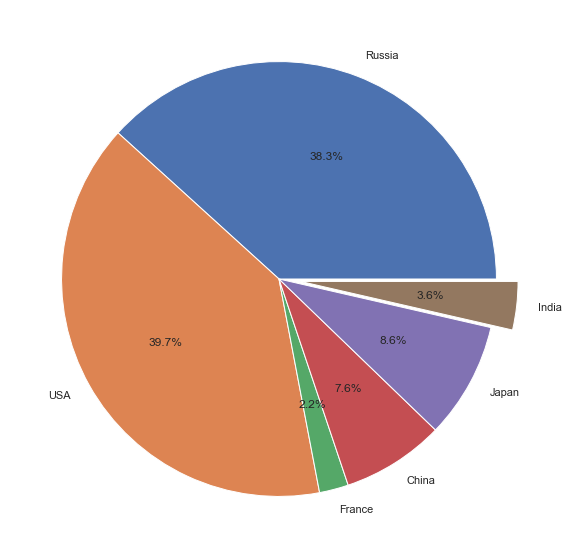

In [42]:
plt.figure(figsize=(10,10))
country = data.groupby('Country')
per_usa = len(country.get_group('USA'))
per_russia = len(country.get_group('Russia'))
per_india = len(country.get_group('India'))
per_china = len(country.get_group('China'))
per_france = len(country.get_group('France'))
per_japan = len(country.get_group('Japan'))              
per = [per_usa, per_russia, per_india, per_china, per_france, per_japan]
labels = ['Russia', 'USA', 'France','China','Japan','India']
plt.figsize = (10,10)
plt.pie(per, labels=labels, explode=[0,0,0,0,0,0.1], autopct= '%1.1f%%' )

LETS ANALYE USA SPACE MISSIONS

c:\users\pc-lenovo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status Mission', ylabel='count'>

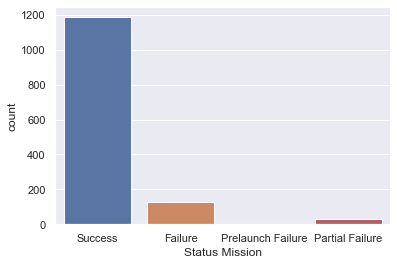

In [44]:
usa = country.get_group('USA')
sns.countplot(usa['Status Mission'])

Text(0.5, 1.0, 'Percentsge successful and failed missions by USA')

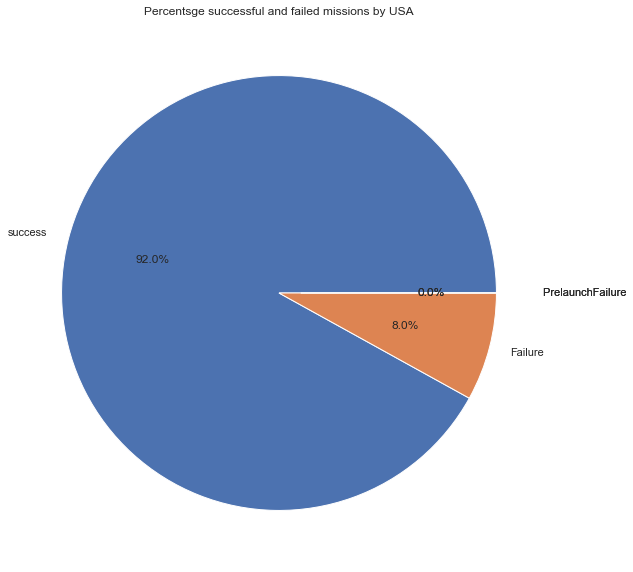

In [45]:
plt.figure(figsize=(10,10))
success = usa['Status Mission'].isin(['Success']).sum()
failure = usa['Status Mission'].isin(['Failure']).sum()
prelaunch_failure = usa['Status Mission'].isin([' Prelaunch Failure']).sum()
partial_failure = usa['Status Mission'].isin(['Partial_failure']).sum()
outcome = [success ,failure ,prelaunch_failure, partial_failure]
labels = ['success', 'Failure',' PrelaunchFailure',' PrelaunchFailure']
plt.pie(percentages ,labels =labels ,explode=[0,0,0.1,0.1],autopct='%1.1f%%')
plt.title('Percentsge successful and failed missions by USA')

RUSSIA

c:\users\pc-lenovo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status Mission', ylabel='count'>

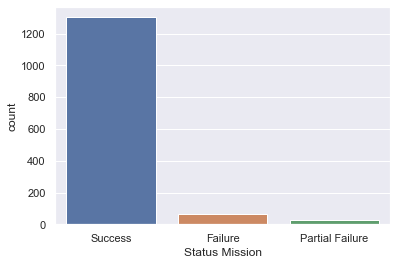

In [47]:
russia = country.get_group('Russia')
sns.countplot(russia['Status Mission'])

Analyzing the feature status rocket

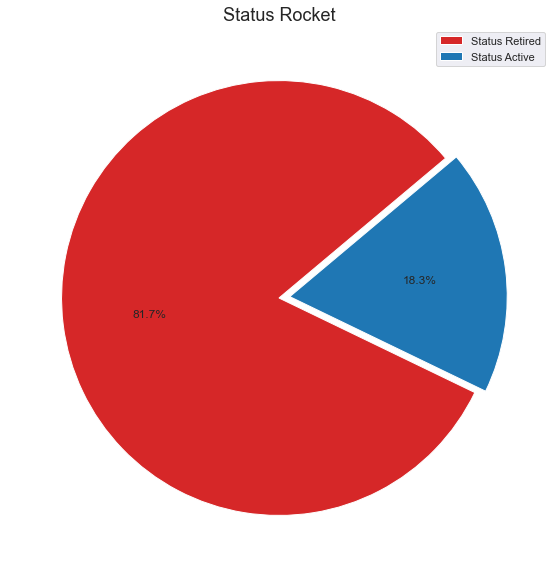

In [54]:
plt.figure(figsize=(10,10))
st= data['Status Rocket'].value_counts()
plt.pie(st, shadow=False, autopct='%1.1f%%', colors= ('tab:red' ,'tab:blue'), explode=(0,0.05),startangle=40)
plt.legend(['Status Retired','Status Active'])
plt.title('Status Rocket', fontsize=18)
plt.show()

Visualising the year wise change in the number of space missions

In [55]:
data['Year'] = pd.to_datetime(data['Datum']).apply(lambda year :year.year)


c:\users\pc-lenovo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

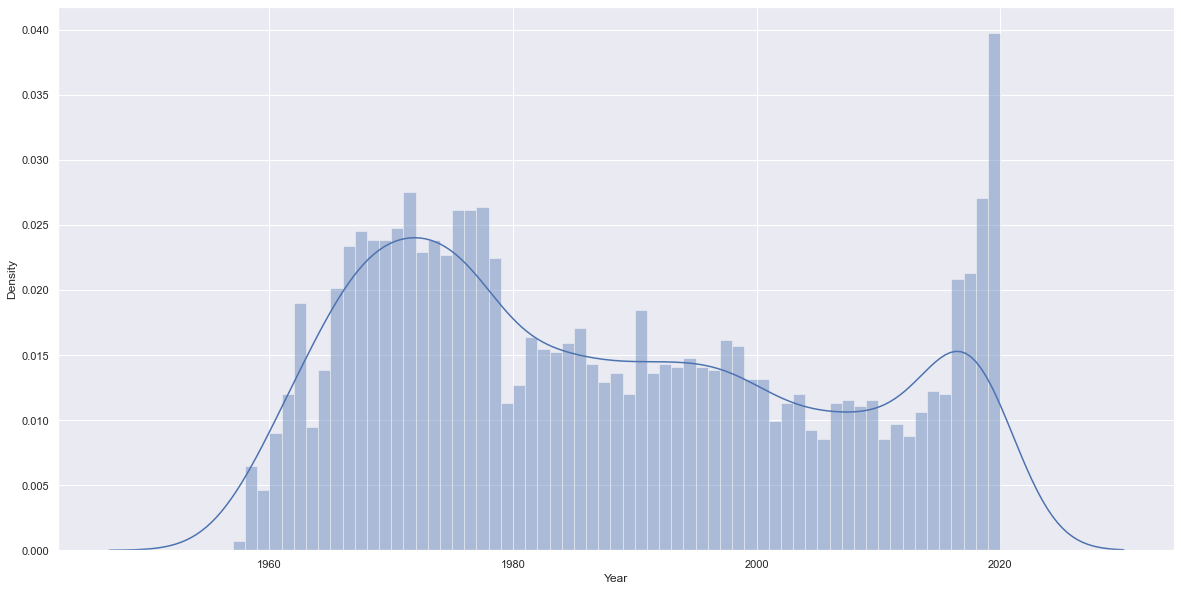

In [60]:
plt.figure(figsize=(20,10))
sns.distplot(data['Year'],bins = 63)    

<AxesSubplot:xlabel='count', ylabel='Year'>

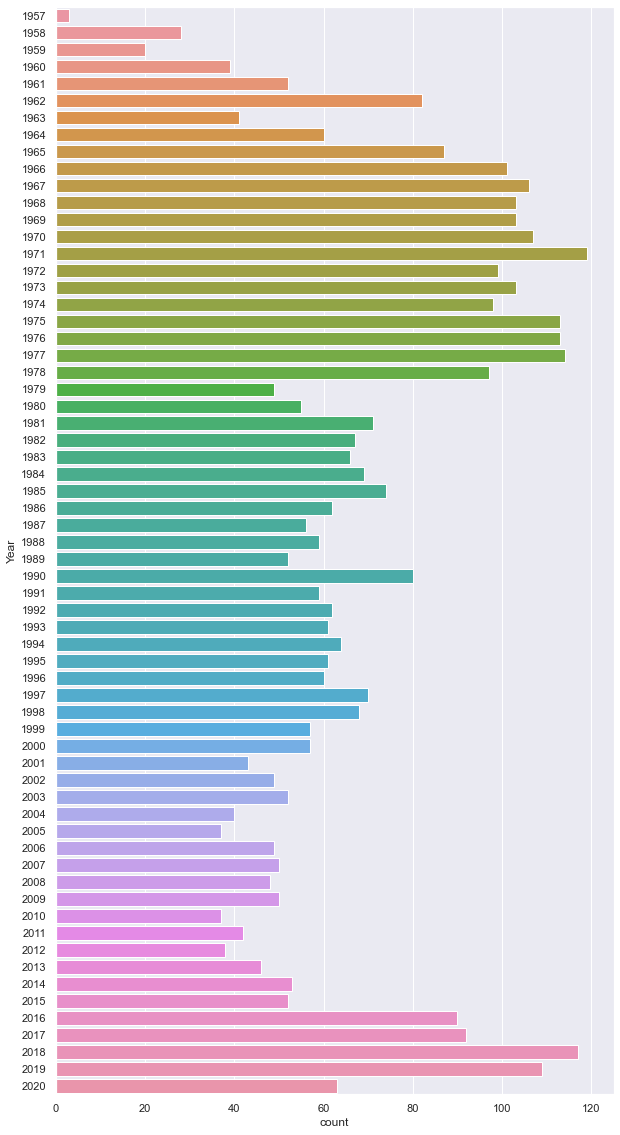

In [61]:
plt.figure(figsize=(10,20))
sns.countplot(y= data['Year'])